# Домашняя работа №3

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

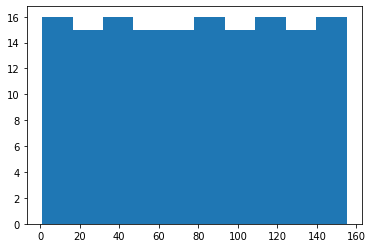

In [130]:
freedom = df['Freedom'].dropna().astype('int64')

plt.hist(freedom, 10)
# Полагаю, что по-другому как равномерное это не назвать, хотя получается замок

(array([0.00754085, 0.00628404, 0.00628404, 0.00628404, 0.00628404,
        0.00628404, 0.00628404, 0.00754085, 0.00628404, 0.00628404,
        0.00628404, 0.00628404, 0.00628404, 0.00628404, 0.00628404,
        0.00754085, 0.00628404, 0.00628404, 0.00628404, 0.00628404,
        0.00628404, 0.00628404, 0.00754085, 0.00628404, 0.00628404,
        0.00628404, 0.00628404, 0.00628404, 0.00628404, 0.00754085]),
 array([  1.        ,   6.13333333,  11.26666667,  16.4       ,
         21.53333333,  26.66666667,  31.8       ,  36.93333333,
         42.06666667,  47.2       ,  52.33333333,  57.46666667,
         62.6       ,  67.73333333,  72.86666667,  78.        ,
         83.13333333,  88.26666667,  93.4       ,  98.53333333,
        103.66666667, 108.8       , 113.93333333, 119.06666667,
        124.2       , 129.33333333, 134.46666667, 139.6       ,
        144.73333333, 149.86666667, 155.        ]),
 <a list of 30 Patch objects>)

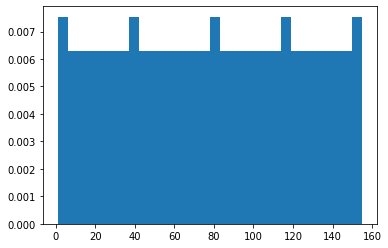

In [112]:
affect = df['Positive affect'].dropna()


plt.hist(affect, bins=30, density=True)
# То же, что и в первом случае

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [193]:
import math

# Медиана (1 способ)

freedom = freedom.sort_values().reset_index().Freedom
md = freedom[int(len(freedom)/2)]

# Медиана (2 способ)

md = statistics.median(freedom)

# Минимум

min(freedom)

# Максимум

max(freedom)

# Стандартное отклонение (1 способ)

average = freedom.mean()
summ = 0
for element in freedom:
    diff = (element - average)**2
    summ += diff
stdev = math.sqrt(summ/(len(freedom)))
    
# Стандартное отклонение (2 способ)
stdev = statistics.pstdev(freedom)

# Дисперсия
d = stdev**2
d = statistics.pvariance(freedom)

# Размах
sweep = max(freedom) - min(freedom)
sweep


print(f'Медиана: {md}, Минимум: {min(freedom)}, Максимум: {max(freedom)}, Стандартное отклонение: {stdev},\n Дисперсия: {d}, Размах: {sweep}')


Медиана: 78, Минимум: 1, Максимум: 155, Стандартное отклонение: 44.74371464239419,
 Дисперсия: 2002, Размах: 154


Почему нельзя найти моду?

In [28]:
# Нет повторяющихся значений
len(freedom) == len(freedom.unique())

True

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

0.6817698430601657

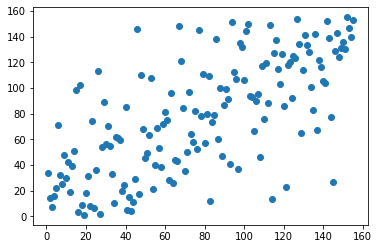

In [62]:
plt.scatter(affect, freedom)   
    
from scipy.stats import pearsonr

corr, p_value = pearsonr(f, a)
corr
# Коэфицеент кореляции - 0,68 говорит об относительной взаимосвязи динамики этих двух параметров

Нормализовать данные колонки Freedom (централизация + масштабирование)

155

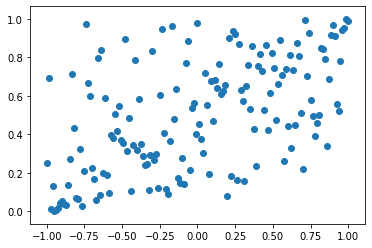

In [146]:
mean1 = statistics.mean(freedom)
normalization = freedom - mean1

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

normalization1 = min_max_scaler.fit_transform(np.array(normalization).reshape(-1, 1))
y = np.linspace(0, 1, 155)
plt.scatter(normalization1, y)

Построить матрицу корреляций для всех колонок таблицы

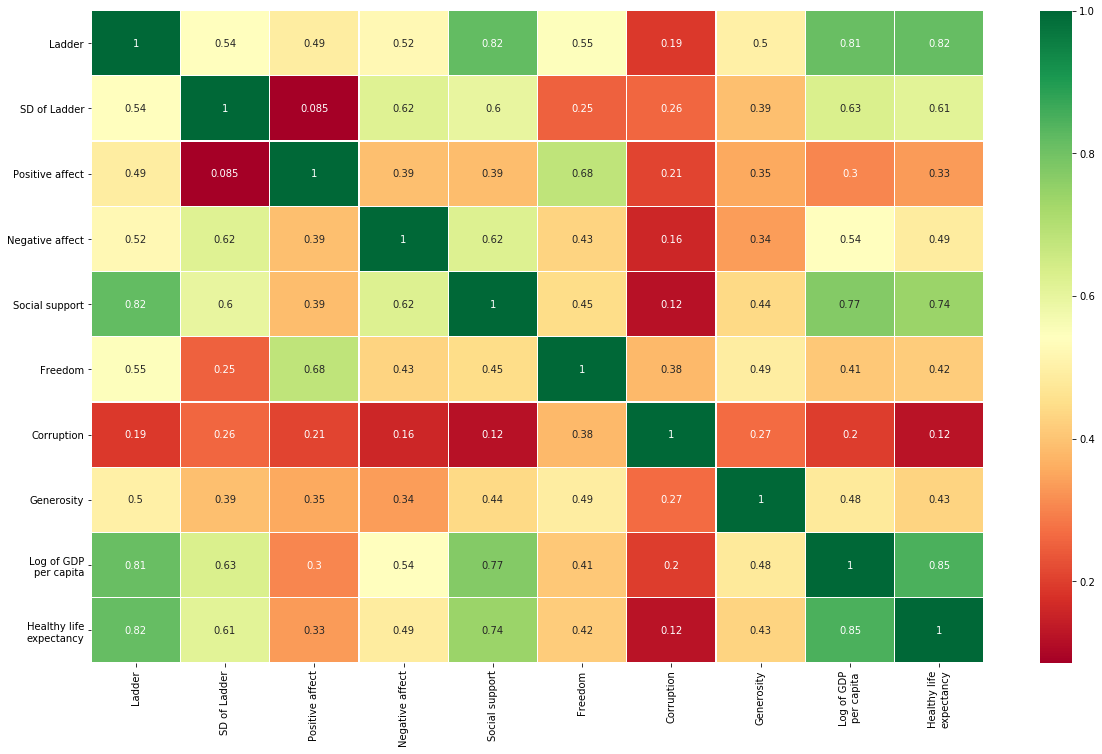

In [170]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20, 12)


Загрузить таблицу цен на авокадо: 

In [7]:
table=pd.read_csv('avocado.csv')
table

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Сделать частотный график колонки AveragePrice. Какое это распределение?

1.41 1.37


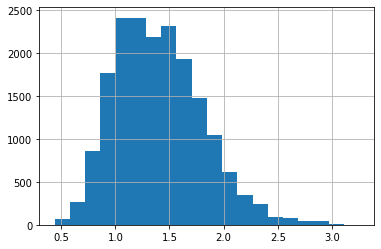

In [192]:
plt.hist(table.AveragePrice, 20)
plt.grid()

plt.plot()
# Нормальное распределние, но как видим левая часть графика меньше правого, медиана меньше среднего значения
print(round(statistics.mean(table.AveragePrice), 2), statistics.median(table.AveragePrice)) 


Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [153]:
cor1, _1 = pearsonr(table['4046'], table['4225'])
cor1
# Количество разных типов авокадо сильно коррелируют между собой ввиду устоявшегося спроса на эти продукты
# в разрезе всего населения

0.9261099558992296

In [166]:
cor2, _2 = pearsonr(table['4770'], table['AveragePrice'])
cor2
# Между количеством любого типа авокадо и среднерыночной стоимостью авокадо заметна слабая корреляция
# Нет зависимости между изменением количества товара и его стоимостью, это есть факт низкой эластичности
# параметров цены и спроса

-0.17944598397975622